# Final Degree Project- CAUSALITY AND INTERPRETABILITY FOR MACHINE LEARNING WITH CLINICAL DATA

## Traditional Interpretability Methods with Clinical Data- Interpreting Stroke Predictions. 

By Gabriela Gutiérrez-Colomer mentored by Dr. Felipe Alonso Atienza 

In [1]:
from sklearn import model_selection   
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

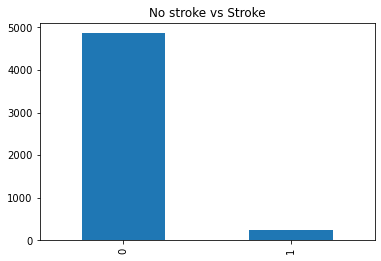

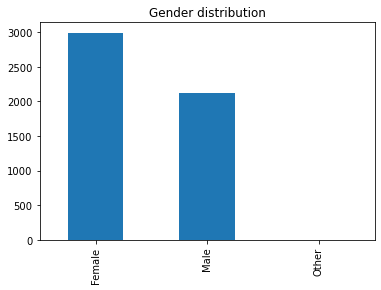

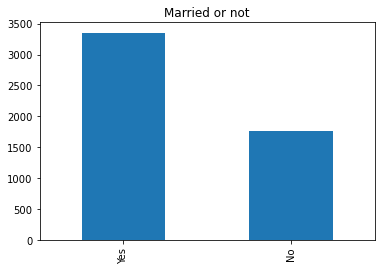

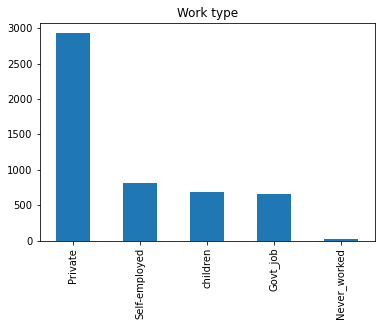

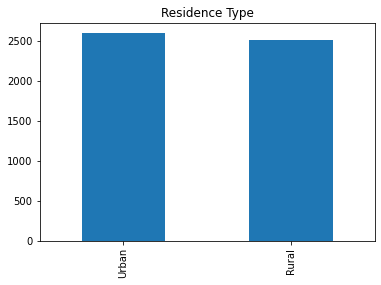

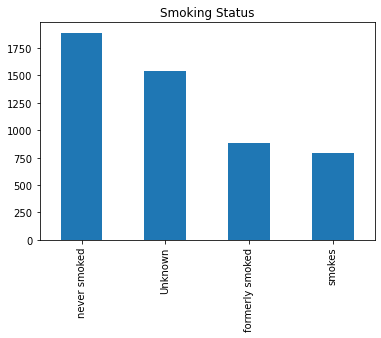

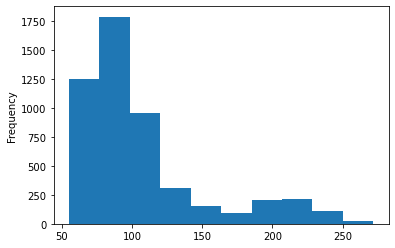

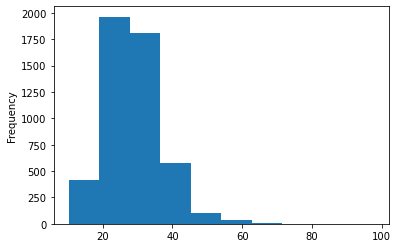

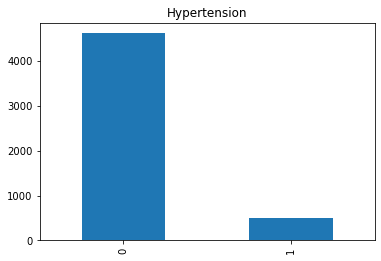

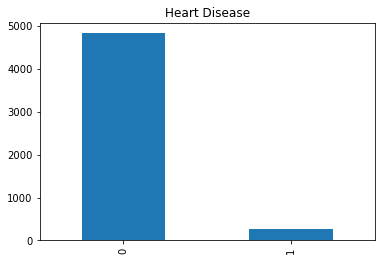

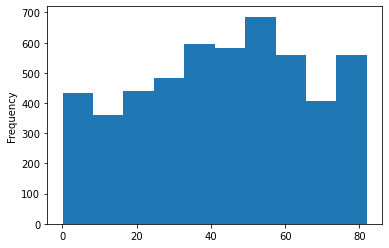

In [2]:
%run Stroke_Data_Treatment.ipynb

## Balancing the data
This database is characterised by very few patients who have suffered a stroke, therefore, it is necessary to balance the database in some way. I decided to use the SMOTE method from `imblear.over_sampling` library to create new patients that represent class 1 (stroke). This technique was described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled “SMOTE: Synthetic Minority Over-sampling Technique.”

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

In [3]:
# split into input (X) and output (y) variables
X= data.drop(['stroke'], axis = 1)
y= data['stroke']

In [4]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

<AxesSubplot:title={'center':'No stroke vs Stroke'}>

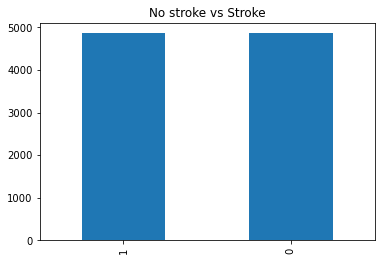

In [5]:
pd.Series(y_res).value_counts().plot.bar(title="No stroke vs Stroke")

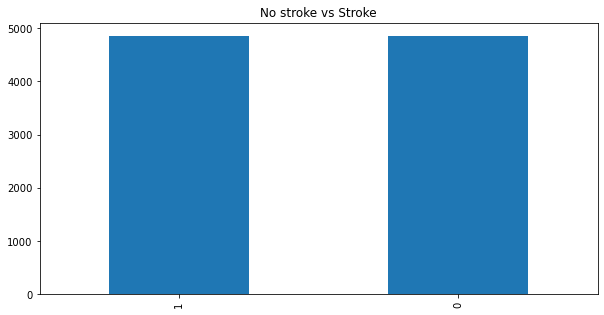

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
pd.Series(y_res).value_counts().plot.bar(title="No stroke vs Stroke")
plt.savefig('smote.png',format='png',dpi=200)

## Split data into training and test sets.

We will start splitting our dataset into independent variables (features) and dependent variable (outcome). Our outcome is `stroke`. We would like to predict if the patient has a stroke or not with the variable `stroke`, if the predictor gives a 1 it will mean that the patient has a stroke, if it gives a 0 it will mean that the patient does not have a stroke. 

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=1)

We will implement a `StandardScaler` for the standarization of our data, in order to homogenize and allow algorithms to converge faster.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm  = scaler.transform(X_test)

# Baseline Algorithm for predicting a stroke. 
## Traditional Interpretable Model- Logistic Regression
Using the baseline algorithm, we will assess the interpretability of the predictor. In this case, I will use a logistic regression model to predict whether the patient will be having a stroke or not. 
**Logistic regression** is considered a traditional interpretability model. **A 1 will mean that the patient will have a stroke, and a 0 will mean that the patient will not have a stroke**. 

PERFORMANCE METRICS
	TRAIN	TEST
ACC:	94.96	95.27
SEN:	90.99	91.67
ESP:	98.91	98.90
PPV:	98.82	98.82
F1:	94.74	95.11


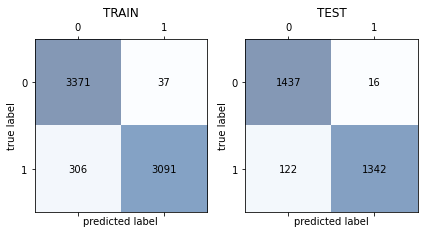

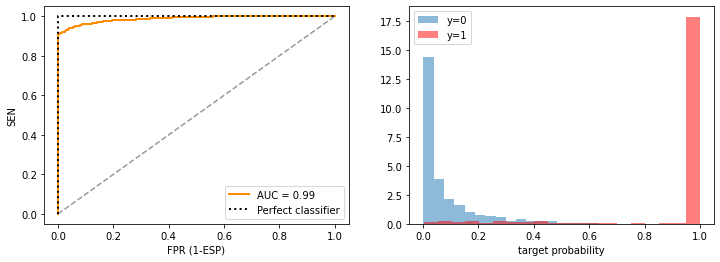

In [9]:
from sklearn.linear_model import LogisticRegression
from functions import analyze_train_test_performance

# Logistic regression
lr_model = LogisticRegression().fit(X_train_norm,y_train)

# Visualize results
analyze_train_test_performance(lr_model,X_train_norm,X_test_norm,y_train,y_test)

### How does the model make the decision for the classification between one class and the other?
To explain how the algorithm is able to classify one class and another we will use the odds ratio. The odds ratio is the probability of event over the probability of no event, the logistic regression is going to be based on how the prediction changes when one of the features is changed by 1 unit. The odds ratio is calculated: 
$$\frac{odds_{x_{j}+1}}{odds} = \frac{exp(\beta_{0}+ \beta_{1}x_{1}+... \beta_{j}(x_{j}+1)+...+ \beta_{p}x_{p})}{exp(\beta_{0}+ \beta_{1}x_{1}+...+ \beta_{j}x_{j}+...+ \beta_{p}x_{p})}$$

In [10]:
#with the function coef we calculate the values of the coefficients of the model. 
#remeber that they represent the log odds, so they must be changed to another scale to interpret them. 
log_odds = lr_model.coef_[0]
pd.DataFrame(log_odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
age,1.807866
avg_glucose_level,0.300374
bmi,0.100512
heart_disease,-0.073042
gender_Other,-0.100537
hypertension,-0.124974
work_type_Never_worked,-0.345186
ever_married,-0.351326
work_type_children,-1.416848
work_type_Govt_job,-1.669410


In [11]:
#if we take the exponential our logs will be eliminated. 
odds = np.exp(lr_model.coef_[0])
pd.DataFrame(odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)


,coef
age,6.097421
avg_glucose_level,1.350364
bmi,1.105737
heart_disease,0.929562
gender_Other,0.904351
hypertension,0.882520
work_type_Never_worked,0.708089
ever_married,0.703754
work_type_children,0.242477
work_type_Govt_job,0.188358


In [14]:
import dataframe_image as dfi
dfi.export(pd.DataFrame(odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False),"mytable.jpeg")

objc[66858]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb56b94ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/105.0.5195.125/Libraries/libGLESv2.dylib (0x110134e08). One of the two will be used. Which one is undefined.
[1003/183655.307929:INFO:headless_shell.cc(660)] Written to file /var/folders/ss/pxphtxf12w7440tfj1j2nh_c0000gn/T/tmpsr8e8ix9/temp.png.


Remeber that: 
- **Class 1: will suffer a stroke.**
- **Class 0: will not suffer a stroke.** 

To understand the odds ratio, we must first focus on class 1 predictions. For example if the first coefficient `age` increases by 1 unit, the odds represented in the observations targeted as 1 are over 6.09 times as large as the odds they wont be in the target class. So this means, that if a patient increases his/her age by 1 unit, his/her probabilities of having a stroke are 6.09 times higher. The model also relies on other variables such as `avg_glucose_level` meaning that if that variable increases by 1 unit, the probabilities of having a stroke are 1.35 times higher. 

## Traditional Interpretable Model- Decision Tree

best mean cross-validation score: 0.885
best parameters: {'max_depth': 1}
PERFORMANCE METRICS
	TRAIN	TEST
ACC:	78.07	78.06
SEN:	88.40	88.32
ESP:	67.78	67.72
PPV:	73.23	73.38
F1:	80.10	80.16


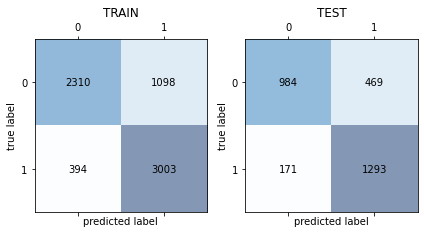

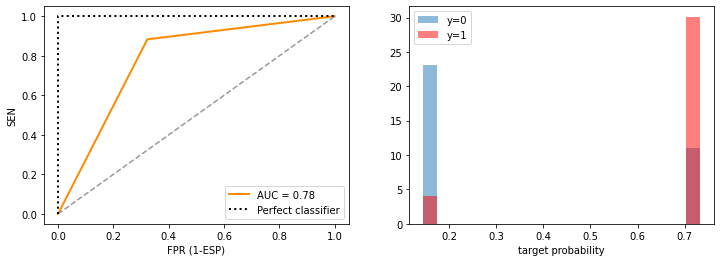

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from functions import hyper_parameters_search
from functions import analyze_train_test_performance

# Metric for the scoring
scorer = 'recall' 

# Decision trees
param_grid = {'max_depth': range(1, 5)}

# Customized function
grid_tree = hyper_parameters_search(DecisionTreeClassifier(random_state = 0), X_train , y_train, param_grid, scorer = scorer)

# do the plotting
#plot_cv_scoring(grid_tree,'max_depth',scorer, plot_errors = True)

dt_model =  DecisionTreeClassifier(**grid_tree.best_params_).fit(X_train ,y_train)

# Analyze results
analyze_train_test_performance(dt_model,X_train ,X_test ,y_train,y_test)

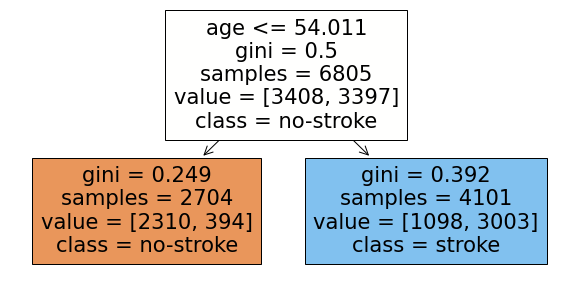

In [16]:
from sklearn.tree import plot_tree

# set plot dimensions
plt.figure(figsize=(10, 5))

feature_names=X_train.columns

plot_tree(
    dt_model,
    feature_names=feature_names, 
    class_names=['no-stroke','stroke'], 
    filled=True
)

plt.show()

## Save the Tree as an Image

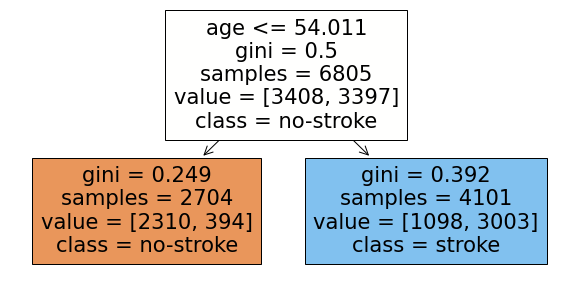

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plot_tree(
    dt_model,
    feature_names=feature_names, 
    class_names=['no-stroke','stroke'], 
    filled=True
) 
plt.savefig('tree.png',format='png',dpi=200)

### How does the model classifies for one class or another? 

The objective of the decision tree is, in this case, to classify whether the patient will be having a stroke or not, and to do so, it will create a decision system based on the importance of the variables. How is the algorithm able to decide which variable is important and which is not? 
In this particular case, our goal is to reduce the gini index (since it is a classification problem), along the path that the decision tree will take, a formula will be used that will evaluate how important a variable is.


First of all what formula does the gini index follow? $$I_{G}(n)=1- \sum_{i=1}^{J}(p_{i})^{2}$$ 

The objective is to reduce the gini index so the node is as pure as possible. Of course, there are varaibles that are going to contribute more to this purity than others and here is where interpretability comes. **The more reduced the gini index is by a variable the more important the varaible.** 

Building a decision tree means taking a decision path, it splits several times to either subtract or add a variable to reduce the gini index and increase purity. To decide what contribution a variable has there is a formula: 
$$\hat{f}(x)= \overline{y} + \sum_{d=1}^{D}split.contrib(d,x) = \overline{y} + \sum_{j=1}^{p}feat.contrib(j,x)$$ Although the formula also takes into account the splits contribution, the decision is principally made by the feature importance explained above. 

#### Interpreting results-Decision Tree
In this case, the most important feature, the one that reduces the most the gini index and then establishes a cut-off value for the algorithm to decide between one class and the other is `age` of the patient. So for the algorithm, if your patient is older, specifically more than 54 years old, is goin to be classifed as a prone-to-stroke patient. If the patient is younger than 54 years old, then your classifier will most probably decide that your patient must be classified as non-stroke patient. 

#### Disadvantages-Decision Tree
In this case, the gini indexes for both of the splits are quite high. A gini index must be as close to 0 as possible to show purity in the node. The lower the gini index the more pure our node is and thus, the more reliable because it means that only patients with that specific category reside there. 